In [1]:
# Data Source: https://www.alphavantage.co
# API Key: EVMRD162IRCITXSI

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Download stock historical data and visualize it
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.techindicators import TechIndicators
ts = TimeSeries(key='EVMRD162IRCITXSI',output_format='pandas')
fd=FundamentalData(key='EVMRD162IRCITXSI',output_format='pandas')
TI=TechIndicators(key='EVMRD162IRCITXSI',output_format='pandas')
# Get json object with the intraday data and another with  the call's metadata

In [4]:
# Download stock historical data
stock_data,stock_meta_data=ts.get_daily_adjusted('AAPL',outputsize='full')

In [5]:
# Download stock technical indicators
ema_data,ema_matadata=TI.get_ema('AAPL', interval='daily', time_period=20, series_type='close')
sma_data,sma_matadata=TI.get_sma('AAPL', interval='daily', time_period=20, series_type='close')
macd_data,macd_matadata=TI.get_macd('AAPL', interval='daily', series_type='close')
stoch_data,stock_matadata=TI.get_stoch('AAPL', interval='daily')
rsi_data,rsi_matadata=TI.get_rsi('AAPL', interval='daily', time_period=20)

In [6]:
obv_data,obv_matadata=TI.get_obv('AAPL', interval='daily')
cci_data,cci_matadata=TI.get_cci('AAPL', interval='daily', time_period=20)
aroon_data,aroon_matadata=TI.get_aroon('AAPL', interval='daily', time_period=20, series_type='close')
bbands_data,bbands_matadata=TI.get_bbands('AAPL', interval='daily', time_period=20,  series_type='close')
ad_data,ad_matadata=TI.get_ad('AAPL', interval='daily')

In [7]:
# Using the most recent five year historical stock price data for analysis

stock_price = stock_data[stock_data.index > '2000-04-01']['5. adjusted close']
ema_recent = ema_data[ema_data.index > '2000-04-01']['EMA']
sma_recent = sma_data[sma_data.index > '2000-04-01']['SMA']
macd_recent = macd_data[macd_data.index > '2000-04-01']['MACD']
obv_recent = obv_data[obv_data.index > '2000-04-01']['OBV']
rsi_recent = rsi_data[rsi_data.index > '2000-04-01']['RSI']
stoch_recent=stoch_data[stoch_data.index > '2000-04-01']['SlowD']
cci_recent=cci_data[cci_data.index > '2000-04-01']['CCI']
aroon_recent=aroon_data[aroon_data.index > '2000-04-01']['Aroon Up']
bbands_recent=bbands_data[bbands_data.index > '2000-04-01']['Real Middle Band']
ad_recent=ad_data[ad_data.index > '2000-04-01']['Chaikin A/D']

In [8]:
#candidate_features=stock_price.to_frame().join(ema_recent).join(macd_recent).join(obv_recent).join(rsi_recent)
candidate_features=stock_price.to_frame().join(ema_recent).join(sma_recent).join(macd_recent).join(obv_recent).join(rsi_recent).join(stoch_recent).join(cci_recent).join(aroon_recent).join(bbands_recent).join(ad_recent)
#candidate_features

# normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler
normed_values=MinMaxScaler().fit_transform(candidate_features.values)
normed_candidate_features=pd.DataFrame(normed_values,columns=candidate_features.columns,index=candidate_features.index)

### Target data

In [10]:
target_feature=np.array(normed_candidate_features["5. adjusted close"])
target_feature

array([0.95666557, 0.95963847, 0.9355055 , ..., 0.00561012, 0.00544474,
       0.00576796])

###     features data after normalized

In [11]:
normed_features=normed_candidate_features.iloc[:,1:].copy()
normed_features
#np.var(features_data, axis = 0)

,EMA,SMA,MACD,OBV,RSI,SlowD,CCI,Aroon Up,Real Middle Band,Chaikin A/D
date,,,,,,,,,,
2021-02-05,1.000000,1.000000,0.547895,0.936489,0.495211,0.540701,0.555654,0.55,1.000000,0.994208
2021-02-04,0.998175,0.997747,0.550969,0.937120,0.503616,0.366557,0.553268,0.60,0.997747,0.994086
2021-02-03,0.995823,0.993725,0.548851,0.936419,0.449967,0.242789,0.519879,0.65,0.993725,0.993206
2021-02-02,0.995927,0.992633,0.572601,0.937168,0.469620,0.257476,0.540802,0.70,0.992633,0.993863
2021-02-01,0.995219,0.990553,0.591316,0.936482,0.456542,0.385620,0.509944,0.75,0.990553,0.994342
...,...,...,...,...,...,...,...,...,...,...
2000-04-07,0.005846,0.005889,0.381869,0.217891,0.459313,0.516762,0.495927,0.45,0.005889,0.185197
2000-04-06,0.005834,0.005872,0.381943,0.215869,0.404449,0.498767,0.473788,0.50,0.005872,0.182750
2000-04-05,0.005859,0.005864,0.382446,0.218034,0.452434,0.451024,0.495206,0.55,0.005864,0.184539


# Filter based on variance

[0.03288402 0.03303161 0.00384214 0.10168023 0.03049274 0.06437056
 0.01924705 0.13361821 0.03303161 0.11129512]


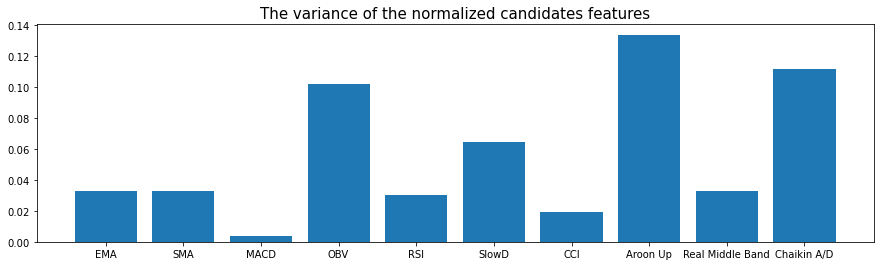

In [12]:
normed_var=np.var(normed_features.values, axis = 0)
normed_features_dict=dict(zip(normed_features.columns,normed_var))
fig = plt.figure(figsize=(15,4))#dpihttp://localhost:8888/notebooks/MSDM%206980%20Data%20Extraction%20API.ipynb#Filter-based-on-variance=70)
plt.bar(normed_features_dict.keys(),normed_features_dict.values())
plt.title("The variance of the normalized candidates features",fontsize=15)
print(normed_var)

In [13]:
sorted_item=sorted(normed_features_dict.items(), key = lambda kv:(kv[1], kv[0]))
left_keys=[key for key,value in sorted_item[3:]]
after_var_left=normed_features[left_keys].copy()
#after_var_left

# Filter based on correlation

In [14]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
 
# 代表选择特征值的数量
 
selectkBest=SelectKBest(f_regression,k=5)
 
# 调用fit方法进行最好特征的选择
 
bestFeature=selectkBest.fit_transform(after_var_left.values,target_feature)
 
# 查看关键因子
columns=after_var_left.columns[selectkBest.get_support()]
after_var_corr_left=after_var_left[columns]
after_var_corr_left

,EMA,Real Middle Band,SMA,OBV,Chaikin A/D
date,,,,,
2021-02-05,1.000000,1.000000,1.000000,0.936489,0.994208
2021-02-04,0.998175,0.997747,0.997747,0.937120,0.994086
2021-02-03,0.995823,0.993725,0.993725,0.936419,0.993206
2021-02-02,0.995927,0.992633,0.992633,0.937168,0.993863
2021-02-01,0.995219,0.990553,0.990553,0.936482,0.994342
...,...,...,...,...,...
2000-04-07,0.005846,0.005889,0.005889,0.217891,0.185197
2000-04-06,0.005834,0.005872,0.005872,0.215869,0.182750
2000-04-05,0.005859,0.005864,0.005864,0.218034,0.184539


# After PCA

In [15]:
from sklearn.decomposition import PCA

dataset=PCA(n_components=3).fit_transform(after_var_corr_left.values)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
import os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

In [32]:
train_size=int(len(dataset)*0.65)
train_list=dataset[:train_size]
test_list=dataset[train_size-1:]
train_price=stock_price[:train_size]
test_price=stock_price[train_size-1:]

#确定训练集和测试集
def create_dateset(dataset,look_back,stock_price):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-6):
        a=dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(stock_price[i+look_back:i+look_back+6])
    return np.array(dataX),np.array(dataY)

look_back=6
trainX,trainY=create_dateset(train_list, look_back,train_price)
testX,testY=create_dateset(test_list, look_back,test_price)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 3))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,3))

#神经网络设定
model=Sequential()
model.add(LSTM(50,input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(50))
          
model.add(Dense(6))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=150,batch_size=32,verbose=2)
model.save(os.path.join('Data','Test'+'.h5'))

#预测
trainPredict=model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/150
107/107 - 12s - loss: 1197.2863
Epoch 2/150
107/107 - 2s - loss: 936.4869
Epoch 3/150
107/107 - 2s - loss: 812.3704
Epoch 4/150
107/107 - 2s - loss: 741.9198
Epoch 5/150
107/107 - 2s - loss: 703.9213
Epoch 6/150
107/107 - 2s - loss: 611.0037
Epoch 7/150
107/107 - 2s - loss: 489.7699
Epoch 8/150
107/107 - 2s - loss: 423.5219
Epoch 9/150
107/107 - 2s - loss: 371.5405
Epoch 10/150
107/107 - 2s - loss: 329.5331
Epoch 11/150
107/107 - 2s - loss: 295.3345
Epoch 12/150
107/107 - 2s - loss: 266.5222
Epoch 13/150
107/107 - 2s - loss: 241.7265
Epoch 14/150
107/107 - 2s - loss: 219.6041
Epoch 15/150
107/107 - 2s - loss: 200.1894
Epoch 16/150
107/107 - 2s - loss: 181.9725
Epoch 17/150
107/107 - 2s - loss: 166.3024
Epoch 18/150
107/107 - 2s - loss: 151.8264
Epoch 19/150
107/107 - 2s - loss: 138.8588
Epoch 20/150
107/107 - 2s - loss: 126.9415
Epoch 21/150
107/107 - 2s - loss: 116.3420
Epoch 22/150
107/107 - 2s - loss: 106.4748
Epoch 23/150
107/107 - 2s - loss: 97.5704
Epoch 24/150
107/10

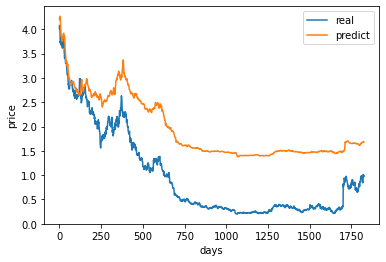

In [33]:
#画图
y=testY
y1=testPredict
plt.plot(y[:,-1],label='real')
plt.plot(y1[:,-1],label='predict')
plt.ylabel('price')
plt.xlabel('days')
plt.legend()
plt.show()

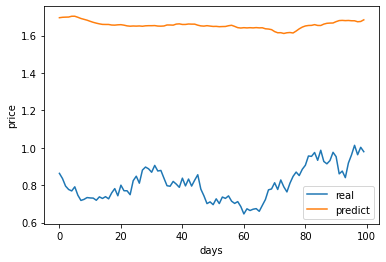

In [34]:
plt.plot(y[-100:,-1],label='real')
plt.plot(y1[-100:,-1],label='predict')
plt.ylabel('price')
plt.xlabel('days')
plt.legend()
plt.show()

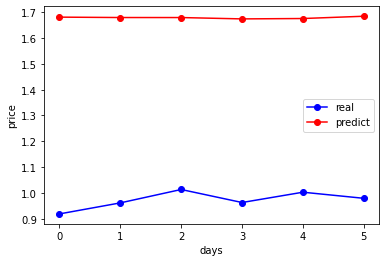

In [35]:
plt.plot(y[-6:,-1],'bo-',label='real')
plt.plot(y1[-6:,-1],'ro-',label='predict')
plt.ylabel('price')
plt.xlabel('days')
plt.legend()
plt.show()